<h1 style="font-family:verdana;"> <center>🏦Bank🏦 Churn Prediction Dataset Using 🦥Classifier Logistics Regression :</center> </h1>

# Table of Contents :
* [1. Introduction](#section1)
* [2. Importing Required Libraries](#section2)
* [3. Data Exploration](#section3)
  - [Feature Description](#section31)
  - [Null Value Distribution](#section32)
  - [Data Cleaning](#section33)
  - [Important Observations](#section34)
* [4.Data Visualization](#section4)
   - [Content Analysis with help of Target Variable](#section41)
   - [HeatMap](#section42)
   - [Important Observations](#section43)
* [5. Data preprocessing and feature engineering](#4)
    - [5.1 Min-Max Scaling or Standardization?](#4.1)
    - [5.2 Encoding Categorical Variables](#4.2)
        - [5.2.1 Label Encoding](#4.2.1)
        - [5.2.2 One hot Encoding](#4.2.2)
        - [5.2.3 Multicolinearity](#4.2.3)
* [5. Modelling](#section5)
   - [Pre-Processing](#section51)
   - [Model Implementation](#section52)
   - [Accuracy vs Model](#section53)
   - [Time Taken vs Model](#section54)
* [6. EndNote](#section6)
  

<a id="section1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Introduction</div>
            
![Bank](https://images.pexels.com/photos/351264/pexels-photo-351264.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500)
<p style="font-size:15px; font-family:verdana; line-height: 1.7em"> We are given the dataset about bank information of around 10000 customers and also given if they have churned or not. Our task is to build a ML model such that we can predict if a customer is going to churn or not. We will also perform EDA on this dataset to inform the bank on what they could do to minimise the churn and build a sustainable business. We are going to use LazyClassifier which has around 29 pre-trained models which will help us find out the best model on basis of accuracy and time taken.</p>

<a id="section2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [1]:
# from IPython.display import clear_output
# !pip3 install -U lazypredict
# !pip3 install -U pandas

# clear_output()

In [2]:
#Importing all essential libraries
import numpy as np , pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


<a id="section3"></a>
#  Data Exploration :

<a id="section31"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Feature Description:</h3>

<ol>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Customer ID</code> - Unique ID given to identify a particular customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Credit Score</code> - It is the score which determines the creditworthiness of a customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Country</code> - The country where customer lives.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Gender</code> - The Sex of customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Age</code> - The age of customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Tenure</code> - Number of years the customer has Bank Account in that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Balance</code> - Amount of money present in customer's bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Products Number</code> - Number of Products from that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Credit Card</code> - Does the customer own a credit card of that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Active Member</code> - Whether the customer is an active member of that Bank.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Estimated Salary</code> - Total Income of the Customer.</li>
    <li style="font-family:verdana;"><code style="font-family:verdana;">Churn</code> - Churn (Loss of existing customers) of the Bank.</li>
</ol>
</div>

In [3]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.drop(columns='customer_id', inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
df.shape

(10000, 11)

In [6]:
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [7]:
df.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
estimated_salary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
credit_score,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
products_number,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
credit_card,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
active_member,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
churn,10000.000000,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
df.nunique()

credit_score         460
country                3
gender                 2
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
dtype: int64

<a id="section32"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Null Value Distribution:</h3>

In [10]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<a id="section33"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Data Cleaning:</h3>
    <p style = "font-family:verdana;">We do not have any missing value in the dataset hence now we can analyse the data much better and build accurate models for prediction. If the dataset would contain missing values, check the below given links to help you know the process of Data cleaning :</p>
        <ol>
    <li><a href="https://www.geeksforgeeks.org/how-to-fill-nan-values-with-mean-in-pandas/">Geek for Geeks</a></li>
    </ol>
        

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">⭐Important Observations :</h3>
    <div class="alert alert-block alert-info">
* <i> There are total of <code>12</code> columns and <code>10000</code> rows in data.</i><br>
* <i> We drop <code>Customer ID</code> feature as it is of no use.</i><br>
* <i> <code>Churn</code> is the Target Variable.</i><br>
* <i> The data is of people from 3 countries, which are <code>France</code>,<code>Germany</code> and <code>Spain</code>.</i><br>
    </div>
    </div>

<a id="section4"></a>
# Data Visualization :

<a id="section41"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Content Analysis with help of Target Variable :</h3>

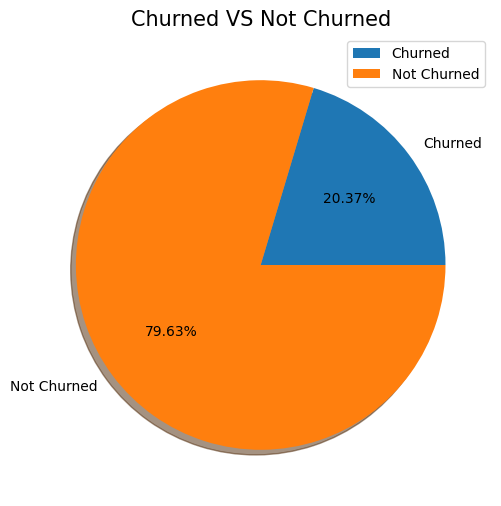

In [12]:
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
labels = ['Churned', 'Not Churned']
figure, axes = plt.subplots(figsize=(8, 6))
axes.pie(sizes, labels=labels,shadow=True,autopct = '%1.2f%%')
plt.legend()
plt.title("Churned VS Not Churned", size = 15)
plt.show()

<a id="section42"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">HeatMap Analysis:</h3>


In [13]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [15]:
df[['credit_score', 'age', 'balance','estimated_salary' ]].corr()

,credit_score,age,balance,estimated_salary
credit_score,1.000000,-0.003965,0.006268,-0.001384
age,-0.003965,1.000000,0.028308,-0.007201
balance,0.006268,0.028308,1.000000,0.012797
estimated_salary,-0.001384,-0.007201,0.012797,1.000000


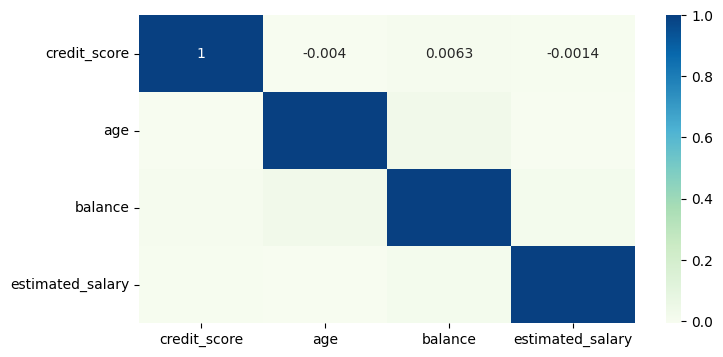

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(data=df[['credit_score', 'age', 'balance','estimated_salary' ]].corr(), annot=True,cmap = "GnBu")
plt.show()


<a id="4"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span>Data preprocessing and feature engineering</div>


In [17]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.replace('Male',1,inplace=True)
df.replace('Female',0,inplace=True)

<a id="4.1"></a>
# <b>5.1 <span style='color:#00008B'>Scaling</span></b>
**feature scaling** is not required for logistic regression


<a id="4.2"></a>
# <b>5.2 <span style='color:#00008B'>Encoding Categorical Variables</span></b>


<a id="4.2.1"></a>
## <b>5.2.1 <span style='color:#00008B'>Label Encoding or two Hot encoding</span></b>

In [19]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

<a id="4.2.2"></a>
## <b>5.2.2 <span style='color:#00008B'>One-Hot Encoding</span></b>


In [20]:
df = pd.get_dummies(df, columns=['country'])


In [21]:
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


<a id="4.2.2"></a>
## <b>4.2.2 <span style='color:#00008B'>Multicollinearity</span></b>

In [22]:
df.corr()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
credit_score,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780
gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.006772,-0.024628,0.016889
age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685
tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868
balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892
products_number,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039
credit_card,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480
active_member,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732
estimated_salary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482
churn,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667


<a id="section5"></a>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">6 <span style='color:#CDA63A'>|</span>Data Splitting and Model Building</div>

<a id="5.1"></a>
# <b>6.1 <span style='color:#00008B'>Data Splitting Or Cross Validation</span></b>


In [23]:
X = df.copy();
X.drop('churn',axis = 1,inplace = True)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

<a id="5.2"></a>
# <b>5.2 <span style='color:#00008B'>Model Buiding and Model Evaluation</span></b>

**LogisticRegression**
<img src="Photos/Logistics.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">
<img src="Photos/Sigmoid_function.png" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model.coef_

array([[-5.00793141e-03, -1.04543927e-03,  4.39218123e-02,
        -2.27067762e-03,  3.56539970e-06, -4.92503022e-04,
        -2.21523600e-04, -1.38033076e-03, -1.43640821e-06,
        -8.92357264e-04,  9.70050467e-04, -2.68326981e-04]])

In [27]:
model.intercept_

array([-0.00019063])

In [28]:
coefficients = model.coef_
feature_names = X_train.columns

In [29]:
coefficients_list = coefficients[0].tolist()  # Convert NumPy array to a list
feature_names_list = feature_names.tolist()
Finally_Re = pd.DataFrame({'coefficients':coefficients_list, 
                           'feeature Name':feature_names_list
                          }) 

In [30]:
Finally_Re

,coefficients,feeature Name
0,-0.005008,credit_score
1,-0.001045,gender
2,0.043922,age
3,-0.002271,tenure
4,0.000004,balance
5,-0.000493,products_number
6,-0.000222,credit_card
7,-0.001380,active_member
8,-0.000001,estimated_salary
9,-0.000892,country_France


In [31]:
Finally_Re.sort_values('coefficients', ascending=False)

,coefficients,feeature Name
2,0.043922,age
10,0.000970,country_Germany
4,0.000004,balance
8,-0.000001,estimated_salary
6,-0.000222,credit_card
11,-0.000268,country_Spain
5,-0.000493,products_number
9,-0.000892,country_France
1,-0.001045,gender
7,-0.001380,active_member


In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: churn, Length: 2000, dtype: int64

In [35]:
confusion_matrix(y_test, y_pred)

array([[1553,   42],
       [ 380,   25]], dtype=int64)

In [36]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    error = 1-accuracy
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specificity':specificity}
    return result

<img src="Photos/confusion_matrix.webp" alt="Logistics" width="50%" style="display: block; margin: 0 auto;">

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
y_pred = model.predict(X_test)
model_eval(y_test,y_pred )

{'Accuracy': 0.789,
 'Error': 0.21099999999999997,
 'Precision': 0.373134328358209,
 'Recall': 0.06172839506172839,
 'Specificity': 0.9736677115987461}

In [39]:
df_churn_no =df[df['churn']==0]

In [40]:
df_churn_no = df_churn_no.sample(n=2037)

In [41]:
df_churn_yes = df[df['churn']==1]

In [42]:
df1 = pd.concat([df_churn_no,df_churn_yes],axis=0)

In [43]:
df1

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
2949,519,1,39,4,111900.14,1,1,1,97577.17,0,0,0,1
5862,682,1,40,4,0.00,2,1,1,140745.91,0,1,0,0
5173,800,1,38,9,0.00,1,1,0,78744.39,0,0,0,1
6425,793,1,39,3,137817.52,1,0,0,83997.79,0,1,0,0
9102,445,0,61,2,137655.31,1,0,1,29909.84,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,498,1,42,3,152039.70,1,1,1,53445.17,1,0,1,0
9982,655,0,46,7,137145.12,1,1,0,115146.40,1,0,1,0
9991,597,0,53,4,88381.21,1,1,0,69384.71,1,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0


In [44]:
x = df1.drop(columns='churn')

In [54]:
y = df1['churn']

In [55]:
x_train, x_test, y1_train, y1_test = train_test_split(x, y)

In [56]:
model2 = LogisticRegression()
model2.fit(x_train, y1_train)

LogisticRegression()

In [57]:
y_pred1 = model2.predict(x_test)

In [65]:
y1_test.values

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
y_pred1

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
confusion_matrix(y1_test, y_pred1)

array([[319, 192],
       [175, 333]], dtype=int64)

In [73]:
tn, fp, fn, tp = confusion_matrix(y1_test, y_pred1).ravel()

In [74]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
error = 1-accuracy
precision=tp/(tp+fp)
recall=tp/(tp+fn)
specificity=tn/(fp+tn)
result={"Accuracy":accuracy,"Error":error, "Precision":precision,"Recall":recall,'Specificity':specificity}

In [75]:
result

{'Accuracy': 0.6398429833169774,
 'Error': 0.3601570166830226,
 'Precision': 0.6342857142857142,
 'Recall': 0.655511811023622,
 'Specificity': 0.62426614481409}